<a href="https://colab.research.google.com/github/galibisquit/Galib-Rizqi-Final-Project/blob/main/Stocks%20Valuation%20using%20Capital%20Asset%20Pricing%20Model(CAPM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
import yfinance as yf
import datetime as dt

In [4]:
# Define the tickers for ADRO.JK and JKLQ45 index
symbols = ['ADRO.JK', '^JKLQ45']

# Fetch historical data for the past 5 years
data = yf.download(symbols, period='5y')['Close']

# Rename columns to reflect tickers for clarity
data.columns = ['ADRO', 'LQ45']

# Display the first few rows of the closing prices
print(data.head())


[*********************100%***********************]  2 of 2 completed

                             ADRO        LQ45
Date                                         
2019-11-22 00:00:00+00:00  1320.0  977.460022
2019-11-25 00:00:00+00:00  1310.0  967.760010
2019-11-26 00:00:00+00:00  1315.0  958.820007
2019-11-27 00:00:00+00:00  1295.0  961.190002
2019-11-28 00:00:00+00:00  1245.0  946.010010


In [5]:
# Reset index to move Date from index to a column
data.reset_index(inplace=True)

# Rename columns for clarity
data.rename(columns={"ADRO.JK": "ADRO", "^JKLQ45": "LQ45"}, inplace=True)

# Display the resulting DataFrame
print(data.head())

                       Date    ADRO        LQ45
0 2019-11-22 00:00:00+00:00  1320.0  977.460022
1 2019-11-25 00:00:00+00:00  1310.0  967.760010
2 2019-11-26 00:00:00+00:00  1315.0  958.820007
3 2019-11-27 00:00:00+00:00  1295.0  961.190002
4 2019-11-28 00:00:00+00:00  1245.0  946.010010


In [6]:
stocks_df = pd.DataFrame(data)
stocks_df

,Date,ADRO,LQ45
0,2019-11-22 00:00:00+00:00,1320.0,977.460022
1,2019-11-25 00:00:00+00:00,1310.0,967.760010
2,2019-11-26 00:00:00+00:00,1315.0,958.820007
3,2019-11-27 00:00:00+00:00,1295.0,961.190002
4,2019-11-28 00:00:00+00:00,1245.0,946.010010
...,...,...,...
1208,2024-11-18 00:00:00+00:00,3700.0,867.739990
1209,2024-11-19 00:00:00+00:00,3710.0,876.929993
1210,2024-11-20 00:00:00+00:00,3690.0,875.130005
1211,2024-11-21 00:00:00+00:00,3680.0,866.229980


In [7]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,ADRO,LQ45
0,2019-11-22 00:00:00+00:00,1320.0,977.460022
1,2019-11-25 00:00:00+00:00,1310.0,967.760010
2,2019-11-26 00:00:00+00:00,1315.0,958.820007
3,2019-11-27 00:00:00+00:00,1295.0,961.190002
4,2019-11-28 00:00:00+00:00,1245.0,946.010010
...,...,...,...
1208,2024-11-18 00:00:00+00:00,3700.0,867.739990
1209,2024-11-19 00:00:00+00:00,3710.0,876.929993
1210,2024-11-20 00:00:00+00:00,3690.0,875.130005
1211,2024-11-21 00:00:00+00:00,3680.0,866.229980


In [8]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

CALCULATE DAILY RETURNS

In [9]:
# Function to calculate the daily returns
def daily_return(df):

  df_daily_return = df.copy()

  # Loop through each stock
  for i in df.columns[1:]:

    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100

    # set the value of first row to zero, as previous value is not available
    df_daily_return[i][0] = 0
  return df_daily_return

In [10]:
# Get the daily returns
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

<ipython-input-9-496a58692ecc>:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
<ipython-input-9-496a58692ecc>:16: FutureWarning: ChainedAssignmentError: behaviour will chang

,Date,ADRO,LQ45
0,2019-11-22 00:00:00+00:00,0.000000,0.000000
1,2019-11-25 00:00:00+00:00,-0.757576,-0.992369
2,2019-11-26 00:00:00+00:00,0.381679,-0.923783
3,2019-11-27 00:00:00+00:00,-1.520913,0.247178
4,2019-11-28 00:00:00+00:00,-3.861004,-1.579292
...,...,...,...
1208,2024-11-18 00:00:00+00:00,-5.612245,-0.453144
1209,2024-11-19 00:00:00+00:00,0.270270,1.059073
1210,2024-11-20 00:00:00+00:00,-0.539084,-0.205260
1211,2024-11-21 00:00:00+00:00,-0.271003,-1.016995


In [11]:
stocks_daily_return['ADRO']

,ADRO
0,0.000000
1,-0.757576
2,0.381679
3,-1.520913
4,-3.861004
...,...
1208,-5.612245
1209,0.270270
1210,-0.539084
1211,-0.271003


<Axes: xlabel='LQ45', ylabel='ADRO'>

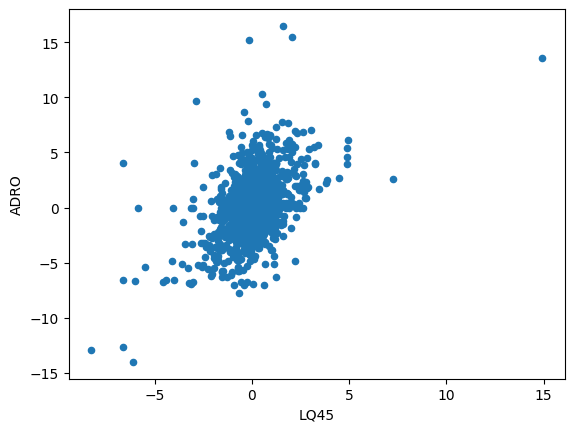

In [12]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'LQ45', y = 'ADRO')

In [13]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return).
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500)
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market.
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market.
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!


beta, alpha = np.polyfit(stocks_daily_return['LQ45'], stocks_daily_return['ADRO'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('ADRO', beta, alpha))

Beta for ADRO stock is = 1.0281942482973594 and alpha is = 0.12624567918458077


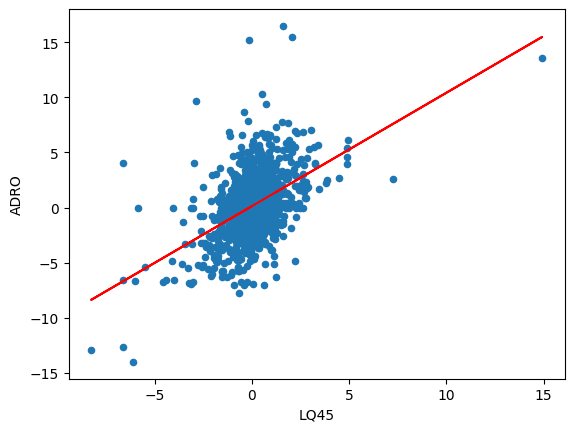

In [14]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'LQ45', y = 'ADRO')

# Straight line equation with alpha and beta parameters
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['LQ45'], beta * stocks_daily_return['LQ45'] + alpha, '-', color = 'r')


APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK

In [15]:
beta

1.0281942482973594

In [16]:
# Let's calculate the average daily rate of return for S&P500
stocks_daily_return['ADRO'].mean()

0.12606755989823573

In [17]:
# Let's calculate the annualized rate of return for S&P500
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday)
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = stocks_daily_return['ADRO'].mean() * 252
rm

31.769025094355403

In [18]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0

# Calculate return for any security (APPL) using CAPM
ER_ADRO = rf + ( beta * (rm-rf) )

In [19]:
ER_ADRO

32.6647288760307

In [21]:
# Let's view alpha for each of the stocks
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,”
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 17%.

alpha

{'ADRO': 0.12624567918458077}

APPLY CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [22]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

['ADRO']

In [23]:
# Define the expected return dictionary
ER = {}

rf = 0 # assume risk free rate is zero in this case
rm = stocks_daily_return['LQ45'].mean() * 252 # this is the expected return of the market
rm

-0.0436552336616184

In [24]:
for i in keys:
  # Calculate return for every security using CAPM
  ER[i] = rf + ( beta[i] * (rm-rf) )

In [25]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, ER[i]))

Expected Return Based on CAPM for ADRO is -0.044886060158953314%


In [26]:
# Assume equal weights in the portfolio
portfolio_weights = 1/8 * np.ones(8)
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [27]:
# Calculate the portfolio return
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

-0.04488606015895331

In [28]:
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is -0.04488606015895331%

